In [26]:
%run feature_extraction.ipynb
%run predict.ipynb

# take onput audio
duration = 6549  # seconds
fs=2560

ch=input(' Press enter to select the audio file(.wav) of your choice to determine emotion ')
import soundfile as sf

CLASS_LABELS = ("Neutral", "Angry", "Happy", "Sad")
from tkinter import filedialog
filename = filedialog.askopenfilename(title='open')
print(" ")
print("The file you have chosen is " , filename)
print(" ")
if not(filename.endswith('.wav')):
    print("YOU HAVE NOT SELECTED THT APPROPRIATE FILE ( PLEASE SELECT AUDIO FILE WITH .WAV EXTENTION)")

 Press enter to select the audio file(.wav) of your choice to determine emotion 
 
The file you have chosen is  C:/Users/Amrutha/Desktop/ml_2020_project/speech_proj_2_mlp_final/data/Angry/03-01-05-01-02-01-18.wav
 


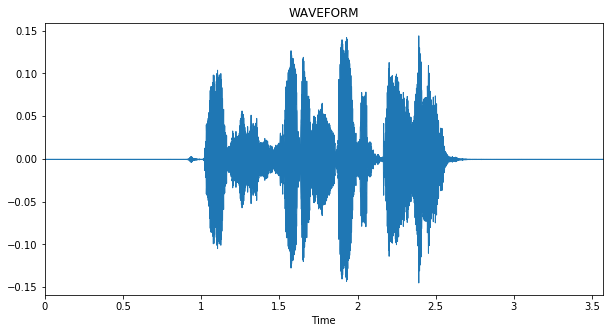

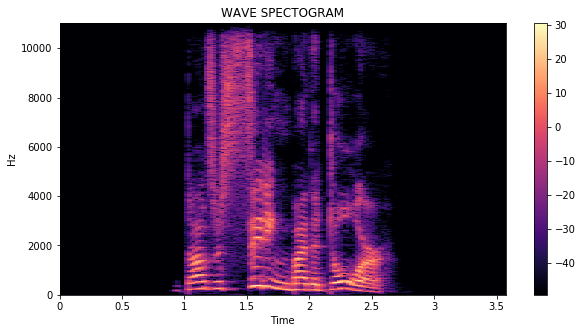

In [27]:
%run plot_graph.ipynb
# plot few graph for the audio
plot = plot_wave_graph(filename)

C:\Users\Amrutha\Anaconda3\lib\site-packages\scipy\io\wavfile.py:254: WavFileWarning: Chunk (non-data) not understood, skipping it.
  WavFileWarning)


Length is greater than the mean signal length defined 
2496


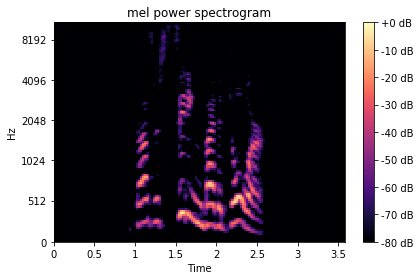

In [28]:
# get the feature with flatten feature vector
to_flatten = True
feature_vector, mel = get_feature_vector_from_mfcc(filename, flatten=to_flatten)

# plot for mfcc
plot.mfcc(mel)

# reshape the feature vector to fit the model
print(len(feature_vector))
xc=np.isnan(feature_vector)
feature_vector[xc]=0
if len(feature_vector) <= 7722:
    l = 7722 - len(feature_vector)
    feature_vector = np.append(feature_vector,np.zeros(l))
else:
    feature_vector = feature_vector[:7722]
feature_vector = np.asarray([np.asarray(row, dtype=float) for row in feature_vector], dtype=float)

In [29]:
# get current working directory 
nb_dir = os.path.split(os.getcwd())[0]
if nb_dir not in sys.path:
    sys.path.append(nb_dir)

In [30]:
# load mlp model
%run nueral.ipynb

model = pickle.load(open('ANN_model_.h5', "rb"))
xc=predict_one(feature_vector,classifier='mlp');
print(xc)
print('prediction from mlp ', CLASS_LABELS[int(xc)])

[1]
prediction from mlp  Angry


In [31]:
# load lstm model
from keras.models import load_model
from keras.models import model_from_json
import json

with open('model_in_json.json','r') as f:
    model_json = json.load(f)
model = model_from_json(model_json)
model.load_weights('LSTM_best_model.h5')

feature_vector = np.asarray([np.asarray(row, dtype=float) for row in feature_vector], dtype=float)
test_feature = np.reshape(feature_vector, (198, 39))
xc=predict_one(test_feature,classifier='LSTM')
print(xc)
print('prediction from LSTM ', CLASS_LABELS[int(xc)])

1
prediction from LSTM  Angry
